<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/Linear_model_Midhun_Jose_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trained weight (w): 3.04100
Trained bias   (b): 1.91323
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


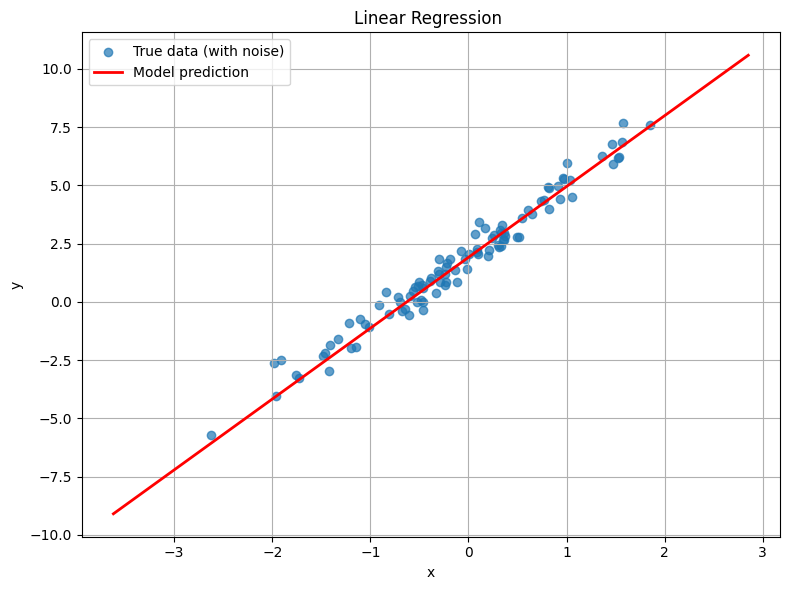

In [ ]:
# Generate data
N = 100
x = np.random.randn(N).astype(np.float32)
noise = np.random.randn(N).astype(np.float32) * 0.5
y = 3.0 * x + 2.0 + noise

# linear model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile: MSE loss, SGD optimizer with small learning rate
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss='mse'
)

# Train
history = model.fit(x, y, epochs=150, verbose=0)

# Extract learned parameters (weight and bias)
w, b = model.layers[0].get_weights()
w = float(w[0][0])
b = float(b[0])

print(f"Trained weight (w): {w:.5f}")
print(f"Trained bias   (b): {b:.5f}")

# Create predictions for a line to plot
x_line = np.linspace(x.min() - 1.0, x.max() + 1.0, 200).astype(np.float32)
y_pred_line = model.predict(x_line).flatten()

# Plot: data points and learned line
plt.figure(figsize=(8,6))
plt.scatter(x, y, label='True data (with noise)', alpha=0.7)
plt.plot(x_line, y_pred_line, color='red', linewidth=2, label='Model prediction')
plt.title('Linear Regression ')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Gradient descent updates weights by iteratively moving them in the opposite direction of the gradient of the loss function with respect to those weights. The gradient points toward the steepest increase in loss, so taking a step in the negative direction reduces the loss. This step size is controlled by the learning rate. In essence, each update is calculated as:

New Weight = Old Weight - (Learning Rate x  partial derivative of loss(MSE) )